In [2]:
import tweepy

In [3]:
from config.token import consumer_secret, consumer_key, access_token_secret, access_token

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
keyword = ('carrefour' + '-filter:retweets')

In [6]:
#Configurando os tweets que quero receber: 
#(q= palavra chave, count= a quantidade de tweets que quero receber, result_type mixed é um misto de populares e recentes.)
tweets = api.search(q=keyword,count=50,result_type='mixed', lang='en')

## Análise de sentimentos
#### Aqui usei a biblioteca textBlob que já traz a função para analisar a polaridade (sentimento) onde retorna um valor entre -1 e 1, onde quanto mais próximo de 1 mais positivo é aquele texto. 

In [7]:
#importação pacotes

from textblob import TextBlob as Tb
import numpy as np


In [8]:
#variável para armazenar as polaridades
analysis = None

In [15]:
#Vetor para armazenar os scores
tweets_score = []

In [16]:
for tweet in tweets:
    
    print('name', tweet.user.screen_name)  
    print('text', tweet.text)
    analysis = Tb(tweet.text)
    polarity = analysis.sentiment.polarity
    tweets_score.append(polarity)  

name INEOSGrenadiers
text Heartbreak as Gianni was reeled in on the Carrefour de l'Arbre sector. He's battling on towards the Velodrome, sitt… https://t.co/xl6oblKhoS
name mikegalsworthy
text Is your Google broken, Guido? There’s a limited strike in the distribution centre of Carrefour in Belgium. 

Now ex… https://t.co/PV0TBAUtBq
name mikegalsworthy
text Oh - and it’s over already:

“On Thursday morning, the strikers at the distribution centre of Kuehne+Nagel and Supe… https://t.co/WcP9WwuuzG
name iforottawa
text @mikemilne18 @JimWatsonOttawa @catherinekitts @Carrefour_Hub @TimTierney @mflalonde @StephenBlais @Laura_Dudas driv… https://t.co/v37lCXHBTv
name joan31817819
text Bag of the day.     

Paragon bag from LULEA 
Find the bag at Carrefour Kenya 

#ootd #bag 

#facebookdown… https://t.co/5V5QUHqty8
name esm_magazine
text European Supermarket News is out! https://t.co/G4c77rz7RN #grocery #carrefour
name __carrefour__
text fucking mark zuckenberg https://t.co/1DWFteC2FD
name bug_wu

In [17]:
print('Vetor de polaridade: ' , tweets_score)

Vetor de polaridade:  [0.0, -0.2357142857142857, 0.0, 0.0, 0.0, 0.0, -0.6, 0.0, 0.0, -0.1, 0.0, 0.5, -0.1, 0.5, 0.75, 0.15, 0.0, 0.4732142857142857, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, -0.16666666666666666, -0.125, -1.0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.0, 0.1, 0.5, 0.8, 0.2, 0.0, 1.0, 0.8, 0.0, 0.0, 0.5666666666666668, 0.0, -0.09285714285714286, -0.1, -0.26666666666666666, -0.26666666666666666, 0.0]


In [201]:
print('Média de Sentimento: ' + str(np.mean(tweets_score)))

Média de Sentimento: -0.06366666666666668


## Armazenando tweets coletados

### Salvando os dados no MongoDB

In [202]:
# importando o pacote pymongo 
import pymongo

In [203]:
# fazendo a conexão com o banco de dados
con = pymongo.MongoClient('localhost', 27017)

In [204]:
# verificando o status da conexão
con

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [205]:
# verificando a lista de bancos já criados
con.list_database_names()

['admin', 'config', 'local', 'twitterdb']

In [206]:
#selecionando o banco de dados que irei utilizar
db = con.twitterdb

In [207]:
#selecionando a coleção para salvar os dados
collection = db.tweets_salvos

In [208]:
db.tweets_salvos.count_documents({})

0

In [209]:
i = 0
for tweet in tweets:
     db.tweets_salvos.insert_one(tweet._json)
     i= i+1

In [210]:
#lista a quantidade tweets inseridos na coleção
print(i)

50


## Criando um dataset com os dados para análise

In [9]:
import pandas as pd

In [10]:
#Lendo o Arquivo que foi exportado em csv
polaridades = pd.read_csv("tweets_salvos.csv", sep=",")

In [11]:
#Vendo quais os nomes das colunas 
polaridades.columns.values

array(['id', 'text', 'user.screen_name'], dtype=object)

In [12]:
# selecionando apenas as colunas que tem Nome do usuário e o texto do tweet
polaridadesRes = ['user.screen_name', 'text']

In [13]:
# criando um dataframe com apenas as colunas selecionadas
dfFinal = polaridades.filter(items=polaridadesRes)
dfFinal.head()

,user.screen_name,text
0,CPeutat,@James7Holland This is due to a strike action ...
1,JimButNotJim,@James7Holland Gaslighting much? This is Carre...
2,BridgetBurke2,@toryboypierce https://t.co/GgwBACh2as\nStrike...
3,paulypauluk,@CllrFareham Context. Carrefour distribution c...
4,rik10002,@Matt_VickersMP @ChrisClarksonMP @ChrisClarkso...


In [18]:
print('Vetor de polaridade: ' , tweets_score)

Vetor de polaridade:  [0.0, -0.2357142857142857, 0.0, 0.0, 0.0, 0.0, -0.6, 0.0, 0.0, -0.1, 0.0, 0.5, -0.1, 0.5, 0.75, 0.15, 0.0, 0.4732142857142857, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, -0.16666666666666666, -0.125, -1.0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.0, 0.1, 0.5, 0.8, 0.2, 0.0, 1.0, 0.8, 0.0, 0.0, 0.5666666666666668, 0.0, -0.09285714285714286, -0.1, -0.26666666666666666, -0.26666666666666666, 0.0]


In [19]:
dfContat=dfFinal.assign(Polarity=tweets_score)

In [20]:
dfContat

,user.screen_name,text,Polarity
0,CPeutat,@James7Holland This is due to a strike action ...,0.000000
1,JimButNotJim,@James7Holland Gaslighting much? This is Carre...,-0.235714
2,BridgetBurke2,@toryboypierce https://t.co/GgwBACh2as\nStrike...,0.000000
3,paulypauluk,@CllrFareham Context. Carrefour distribution c...,0.000000
4,rik10002,@Matt_VickersMP @ChrisClarksonMP @ChrisClarkso...,0.000000
5,mrscorer,@mathewwales92 They know...\nMore likely a str...,0.000000
6,mrscorer,@BrianAuld3 More likely a strike at a carrefou...,-0.600000
7,1487f093q7huweo,@BoyCharioteer @MartinDaubney the Carrefour st...,0.000000
8,InlimboV,@toryboypierce Rubbish. It's a local issue due...,0.000000
9,david_pickworth,@mrjamesob @andigill @James7Holland Here’s the...,-0.100000


In [21]:
# Salvando arquivo csv para criar visualização.
dfContat.to_csv("dfPolarity.csv",sep=";")

### Criando alguns gráficos para análise

In [24]:
import matplotlib.pyplot as plt

In [25]:
n = dfContat['user.screen_name']
p = dfContat['Polarity']

In [221]:
plt.style.use('seaborn')

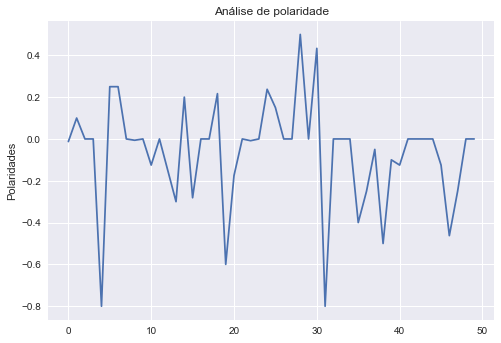

In [222]:
plt.style.use('seaborn')
plt.plot(p)
plt.title('Análise de polaridade')
plt.ylabel('Polaridades')
plt.show()

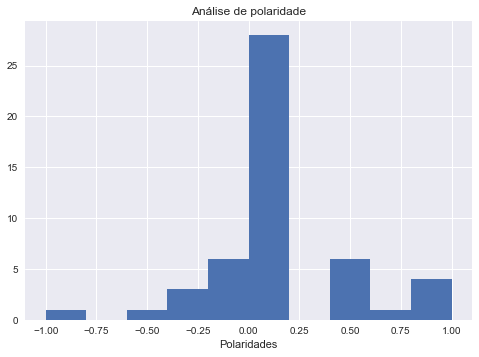

In [47]:
plt.style.use('seaborn')
plt.hist(p)
plt.title('Análise de polaridade')
plt.xlabel('Polaridades')
plt.show()

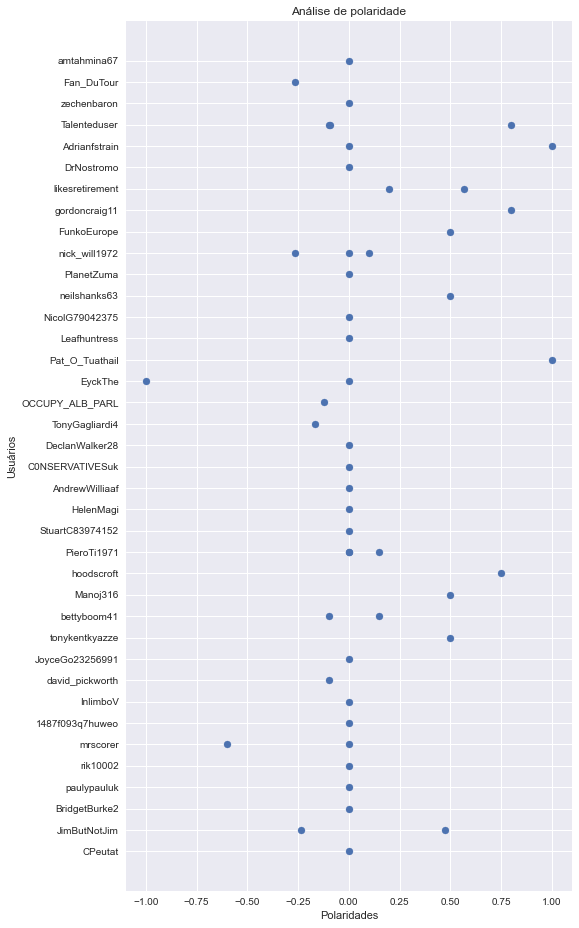

In [54]:
plt.style.use('seaborn')
plt.scatter(p,n)
plt.title('Análise de polaridade')
plt.ylabel('Usuários')
plt.xlabel('Polaridades')
plt.gcf().set_size_inches(8, 16)
plt.show()